# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: MASSA

Student name: DARIO
    
ID: 2039311

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2039311
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 64 72 66 61 62 57 58 56 45]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


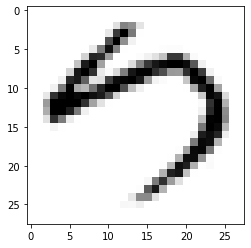

LABEL: 3
INPUT:


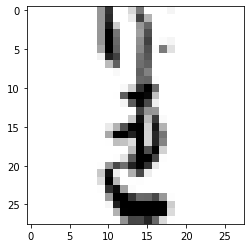

LABEL: 8
INPUT:


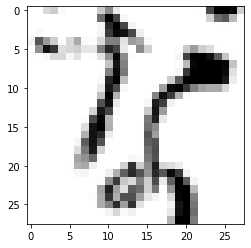

LABEL: 4
INPUT:


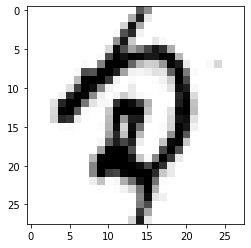

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameters for linear SVM
parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

#train linear SVM

model = GridSearchCV(SVC(kernel='linear'),parameters,cv=4)

model.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')
df = pd.DataFrame(model.cv_results_)
df

RESULTS FOR LINEAR KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059814,0.000829,0.010532,0.000044,0.001,{'C': 0.001},0.473333,0.433333,0.393333,0.400000,0.425000,0.031754,7
1,0.039524,0.000907,0.009692,0.000166,0.01,{'C': 0.01},0.746667,0.706667,0.726667,0.713333,0.723333,0.015275,6
2,0.040803,0.001365,0.009204,0.000114,0.1,{'C': 0.1},0.733333,0.700000,0.766667,0.706667,0.726667,0.026247,5
3,0.040514,0.000915,0.009230,0.000102,1,{'C': 1},0.733333,0.693333,0.773333,0.706667,0.726667,0.030551,1
4,0.040511,0.000943,0.009272,0.000135,10,{'C': 10},0.733333,0.693333,0.773333,0.706667,0.726667,0.030551,1
5,0.040560,0.000979,0.009211,0.000084,100,{'C': 100},0.733333,0.693333,0.773333,0.706667,0.726667,0.030551,1
6,0.040582,0.000960,0.009247,0.000158,1000,{'C': 1000},0.733333,0.693333,0.773333,0.706667,0.726667,0.030551,1


In [9]:
print("Best parameters set found:",model.best_params_)

print("Score with best parameters:",model.best_score_)

print("All scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

Best parameters set found: {'C': 1}
Score with best parameters: 0.7266666666666667
All scores on the grid:
0    0.425000
1    0.723333
2    0.726667
3    0.726667
4    0.726667
5    0.726667
6    0.726667
Name: mean_test_score, dtype: float64
0    0.031754
1    0.015275
2    0.026247
3    0.030551
4    0.030551
5    0.030551
6    0.030551
Name: std_test_score, dtype: float64


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01,0.1,0.03,1],'gamma':[0.01,0.1,0.03,1]}

#run SVM with poly of degree 2 kernel

model = GridSearchCV(SVC(kernel='poly',degree=2),parameters,cv=4)

model.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
df = pd.DataFrame(model.cv_results_)
df

RESULTS FOR POLY DEGREE=2 KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063758,0.001399,0.010719,0.000118,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,16
1,0.048464,0.001287,0.009632,0.000062,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.766667,0.706667,0.753333,0.700000,0.731667,0.028819,9
2,0.060219,0.000888,0.010731,0.000203,0.01,0.03,"{'C': 0.01, 'gamma': 0.03}",0.413333,0.400000,0.366667,0.366667,0.386667,0.020548,14
3,0.052666,0.001180,0.009230,0.000191,0.01,1,"{'C': 0.01, 'gamma': 1}",0.746667,0.706667,0.766667,0.746667,0.741667,0.021794,2
4,0.059103,0.000376,0.010544,0.000040,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.466667,0.420000,0.413333,0.373333,0.418333,0.033124,13
5,0.052844,0.001110,0.009311,0.000182,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.753333,0.706667,0.766667,0.740000,0.741667,0.022298,2
6,0.047976,0.000840,0.009712,0.000143,0.1,0.03,"{'C': 0.1, 'gamma': 0.03}",0.766667,0.693333,0.760000,0.700000,0.730000,0.033500,11
7,0.052843,0.001006,0.009275,0.000116,0.1,1,"{'C': 0.1, 'gamma': 1}",0.746667,0.706667,0.766667,0.746667,0.741667,0.021794,2
8,0.063299,0.000399,0.010779,0.000115,0.03,0.01,"{'C': 0.03, 'gamma': 0.01}",0.126667,0.120000,0.126667,0.133333,0.126667,0.004714,15
9,0.052129,0.000766,0.009300,0.000175,0.03,0.1,"{'C': 0.03, 'gamma': 0.1}",0.766667,0.706667,0.760000,0.746667,0.745000,0.023274,1


In [11]:
print("Best parameters set found:",model.best_params_)

print("Score with best parameters:",model.best_score_)

print("All scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

Best parameters set found: {'C': 0.03, 'gamma': 0.1}
Score with best parameters: 0.745
All scores on the grid:
0     0.120000
1     0.731667
2     0.386667
3     0.741667
4     0.418333
5     0.741667
6     0.730000
7     0.741667
8     0.126667
9     0.745000
10    0.636667
11    0.741667
12    0.731667
13    0.741667
14    0.741667
15    0.741667
Name: mean_test_score, dtype: float64
0     0.000000
1     0.028819
2     0.020548
3     0.021794
4     0.033124
5     0.022298
6     0.033500
7     0.021794
8     0.004714
9     0.023274
10    0.036056
11    0.021794
12    0.028819
13    0.021794
14    0.022298
15    0.021794
Name: std_test_score, dtype: float64


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [12]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01,0.05,0.1,1],'gamma':[0.01,0.1,1,3,5]}

#run SVM with poly of higher degree kernel

model = GridSearchCV(SVC(kernel='poly',degree=3),parameters,cv=4)

model.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=3 KERNEL')
df = pd.DataFrame(model.cv_results_)
df

RESULTS FOR POLY DEGREE=3 KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063834,0.001255,0.010657,0.000053,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,20
1,0.056620,0.001008,0.009194,0.000113,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.720000,0.680000,0.680000,0.700000,0.695000,0.016583,16
2,0.057819,0.001105,0.009186,0.000157,0.01,1,"{'C': 0.01, 'gamma': 1}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2
3,0.057715,0.000973,0.009192,0.000179,0.01,3,"{'C': 0.01, 'gamma': 3}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2
4,0.057487,0.000955,0.009166,0.000141,0.01,5,"{'C': 0.01, 'gamma': 5}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2
5,0.063282,0.000218,0.010642,0.000032,0.05,0.01,"{'C': 0.05, 'gamma': 0.01}",0.220000,0.200000,0.193333,0.193333,0.201667,0.010929,19
6,0.056977,0.001481,0.009046,0.000049,0.05,0.1,"{'C': 0.05, 'gamma': 0.1}",0.733333,0.660000,0.726667,0.700000,0.705000,0.028819,1
7,0.056423,0.001061,0.009019,0.000093,0.05,1,"{'C': 0.05, 'gamma': 1}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2
8,0.056392,0.000908,0.009017,0.000123,0.05,3,"{'C': 0.05, 'gamma': 3}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2
9,0.056393,0.001028,0.009015,0.000096,0.05,5,"{'C': 0.05, 'gamma': 5}",0.733333,0.660000,0.726667,0.693333,0.703333,0.029250,2


In [13]:
print("Best parameters set found:",model.best_params_)

print("Score with best parameters:",model.best_score_)

print("All scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

Best parameters set found: {'C': 0.05, 'gamma': 0.1}
Score with best parameters: 0.7050000000000001
All scores on the grid:
0     0.120000
1     0.695000
2     0.703333
3     0.703333
4     0.703333
5     0.201667
6     0.705000
7     0.703333
8     0.703333
9     0.703333
10    0.333333
11    0.703333
12    0.703333
13    0.703333
14    0.703333
15    0.670000
16    0.703333
17    0.703333
18    0.703333
19    0.703333
Name: mean_test_score, dtype: float64
0     0.000000
1     0.016583
2     0.029250
3     0.029250
4     0.029250
5     0.010929
6     0.028819
7     0.029250
8     0.029250
9     0.029250
10    0.018257
11    0.029250
12    0.029250
13    0.029250
14    0.029250
15    0.022361
16    0.029250
17    0.029250
18    0.029250
19    0.029250
Name: std_test_score, dtype: float64


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [14]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 7, 10, 20, 100],'gamma':[0.001, 0.007, 0.01, 0.03, 0.1,1]}

#run SVM with rbf kernel

# ADD YOUR CODE

model = GridSearchCV(SVC(kernel='rbf'),parameters,cv=4)

model.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')
df = pd.DataFrame(model.cv_results_)
df

RESULTS FOR rbf KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069991,0.001463,0.021905,0.000077,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,28
1,0.070876,0.000710,0.022402,0.000284,0.1,0.007,"{'C': 0.1, 'gamma': 0.007}",0.220000,0.193333,0.200000,0.220000,0.208333,0.011902,21
2,0.071492,0.000097,0.022306,0.000018,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.213333,0.180000,0.206667,0.226667,0.206667,0.016997,22
3,0.073460,0.000097,0.022322,0.000006,0.1,0.03,"{'C': 0.1, 'gamma': 0.03}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,28
4,0.074941,0.000021,0.022339,0.000034,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,28
5,0.074676,0.000089,0.022327,0.000027,0.1,1,"{'C': 0.1, 'gamma': 1}",0.120000,0.120000,0.120000,0.120000,0.120000,0.000000,28
6,0.061840,0.000392,0.022163,0.000045,1,0.001,"{'C': 1, 'gamma': 0.001}",0.600000,0.573333,0.560000,0.540000,0.568333,0.021794,20
7,0.061151,0.000447,0.021636,0.000147,1,0.007,"{'C': 1, 'gamma': 0.007}",0.753333,0.713333,0.740000,0.740000,0.736667,0.014530,12
8,0.069148,0.000382,0.021782,0.000087,1,0.01,"{'C': 1, 'gamma': 0.01}",0.766667,0.726667,0.760000,0.753333,0.751667,0.015184,9
9,0.075533,0.000093,0.022282,0.000064,1,0.03,"{'C': 1, 'gamma': 0.03}",0.700000,0.660000,0.760000,0.673333,0.698333,0.038406,19


In [15]:
print("Best parameters set found:",model.best_params_)

print("Score with best parameters:",model.best_score_)

print("All scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

Best parameters set found: {'C': 7, 'gamma': 0.01}
Score with best parameters: 0.7816666666666667
All scores on the grid:
0     0.120000
1     0.208333
2     0.206667
3     0.120000
4     0.120000
5     0.120000
6     0.568333
7     0.736667
8     0.751667
9     0.698333
10    0.143333
11    0.120000
12    0.735000
13    0.775000
14    0.781667
15    0.720000
16    0.155000
17    0.120000
18    0.741667
19    0.775000
20    0.781667
21    0.720000
22    0.155000
23    0.120000
24    0.746667
25    0.775000
26    0.781667
27    0.720000
28    0.155000
29    0.120000
30    0.735000
31    0.775000
32    0.781667
33    0.720000
34    0.155000
35    0.120000
Name: mean_test_score, dtype: float64
0     0.000000
1     0.011902
2     0.016997
3     0.000000
4     0.000000
5     0.000000
6     0.021794
7     0.014530
8     0.015184
9     0.038406
10    0.005774
11    0.000000
12    0.021279
13    0.008660
14    0.008660
15    0.035590
16    0.009860
17    0.000000
18    0.017240
19    0.008660


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

## ANSWER 1 
Using the linear kernel on this dataset and searching for the best parameter, it has been found the best score of 0.7266666666666667. 
For the polynomial of degree two and three, and the RBF kernel, the best scores are respectively 0.745, 0.7050000000000001 and 0.7816666666666667. 

This means that among the different models, the RBF kernel is the one performing the best, followed by the second degree polynomial in performance. Its is interesting to notice the lowering of performances as soon as an higher order polynomial is considered. 

## TO DO 5
Report here the best SVM kernel and parameters

The best SVM kernel is the rbf one. Parameters: C=7, gamma=0.01
Best SVM training error: 0.000000
Best SVM test error: 0.184500
Trying to plot a confusion matrix, not normalized, here is the result.


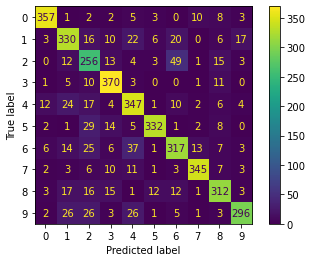

In [16]:
#get training and test error for the best SVM model from CV
from sklearn import metrics
best_SVM = SVC(kernel='rbf', C=7, gamma=0.01)

best_SVM.fit(X_train,y_train)

training_error= 1.0 - best_SVM.score(X_train,y_train)

test_error= 1.0 - best_SVM.score(X_test,y_test)

# (error is 1 - svm.score)

print("The best SVM kernel is the rbf one. Parameters: C=7, gamma=0.01")
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

print("Trying to plot a confusion matrix, not normalized, here is the result.")
predicted = best_SVM.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted, labels=best_SVM.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_SVM.classes_)
disp.plot()

## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [17]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


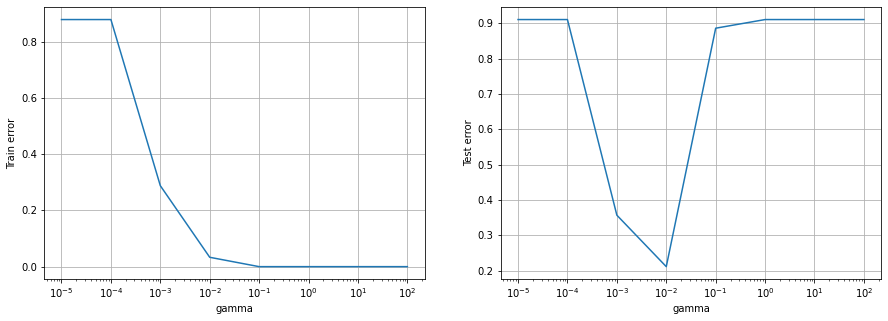

At best gamma, here are the values of training and test errors: [0.03333333] 0.21125000000000005


In [18]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for G in gamma_values:
    #print("G value",G)
    best_SVM = SVC(kernel='rbf', C=1, gamma=G)
    best_SVM.fit(X_train,y_train)
    training_error= 1.0 - best_SVM.score(X_train,y_train)
    test_error= 1.0 - best_SVM.score(X_test,y_test)
    train_acc_list=np.append(train_acc_list,training_error)
    test_acc_list=np.append(test_acc_list,test_error)

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train error')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test error')
ax[1].grid(True)


plt.show()

min_test = min(test_acc_list)
index = np.where(test_acc_list == min_test)
min_train = train_acc_list[index]
print("At best gamma, here are the values of training and test errors:",min_train,min_test)

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## ANSWER 2
Changing gamma, the training and test errors both lower as soon as gamma overcomes 10^-4. The shape of the gaussian kernel is $e^{-\dfrac{|| x-x' ||}{2\sigma}}$. Its shape contains the kernel nature of similarity measure between the samples and sigma controls how 'close' the samples are. Gamma is inversely proportional to sigma. If gamma is too small, we are basically dealing with a too general solution, unable to correctly fit our set also in the training. When gamma (sigma) increases (decreases), the radial solution gets more and more specific around small groups of samples, overfitting the training data and being unable to generalize to the unseen test data. The trade off is, as expected, in the middle, in gamma=0.01, where the test error has a minimum. 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [19]:
X = X[permutation]
y = y[permutation]

m_training = 6000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [599 575 609 538 621 606 603 590 634 625]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [21]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel='rbf', C=7, gamma=0.01)

best_SVM.fit(X_train,y_train)

training_error= 1.0 - best_SVM.score(X_train,y_train)

test_error= 1.0 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000167
Best SVM test error: 0.076167


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [23]:
from sklearn import linear_model

# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C=1e5,fit_intercept=True,max_iter=3000) #a large C disables regularization
logreg.fit(X_train,y_train)
training_error= 1.0 - logreg.score(X_train,y_train)
test_error= 1.0 - logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.302500


## TO DO 9 Try  with regularization (use C=1)¶

In [24]:
from sklearn import linear_model

# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C=1,fit_intercept=True,max_iter=3000) #a large C disables regularization
logreg.fit(X_train,y_train)
training_error= 1.0 - logreg.score(X_train,y_train)
test_error= 1.0 - logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.042500
Best logistic regression test error: 0.240667


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression
## ANSWER 3

**(results relative to a previous total Run before restarting the Kernel and performing the last one)**

 m=600 <br>
 SVM<br>
 Best SVM training error: 0.000000<br>
 Best SVM test error: 0.192694<br>
 LogReg C=1e5<br>
 Best logistic regression training error: 0.000000<br>
 Best logistic regression test error: 0.308771<br>
 LogReg C=1<br>
 Best logistic regression training error: 0.000000<br>
 Best logistic regression test error: 0.296465<br>
 <br>
 m=2000<br>
 SVM<br>
 Best SVM training error: 0.000000<br>
 Best SVM test error: 0.117603<br>
 LogReg C=1e5<br>
 Best logistic regression training error: 0.000000<br>
 Best logistic regression test error: 0.290276<br>
 LogReg C=1<br>
 Best logistic regression training error: 0.001500<br>
 Best logistic regression test error: 0.261707<br>
 <br>
 m=6000<br>
 SVM<br>
 Best SVM training error: 0.000000<br>
 Best SVM test error: 0.073278<br>
 LogReg C=1e5<br>
 Best logistic regression training error: 0.000000<br>
 Best logistic regression test error: 0.293222<br>
 LogReg C=1<br>
 Best logistic regression training error: 0.039000<br>
 Best logistic regression test error: 0.235611<br>
 <br>
 These result clarify the role of the number of samples and of regularization at the same time. When the number of samples increases, the training error decreases consistently for a given method (or a given value of C within the same method). When regularization is considered, the obtained solution will generally be more stable and therefore perform better generalization properties on the test set, loosing at the same time its specialization of the training set. Moreover, when the number of training samples increases, a slight increase is also visible in the train_error due to regularization, probably because of the larger number of samples which suffer by misclassification. 
The comparison confirms the SVM to be the better performing against the simple logistic regressor.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

**Dario Massa NOTE: why clothing? I will plot, basing on the results of the TODO 11 cell, the letters which are more subjected to misclassification both by SVM and logreg**

In [25]:
#LR_prediction = # ADD CODE
#SVM_prediction = # ADD CODE

# ADD CODE



As it will be shown in the next to do, both the **SVM** and **logreg** have the highest misclassification of samples **2** and **4** with, respectively, samples **0** and **6**. By looking at the pictures, we can assume that this happens, in the first case, for the presence of the similar circular pattern, and in the second case for the presence of the similar vertical central pattern. 

INPUT:


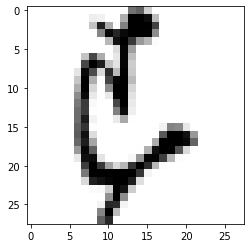

LABEL: 2
INPUT:


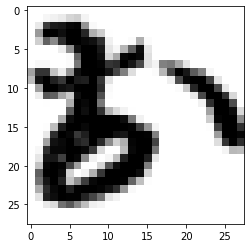

LABEL: 0
INPUT:


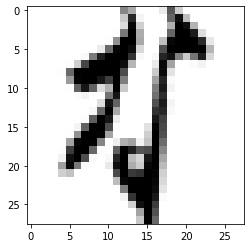

LABEL: 4
INPUT:


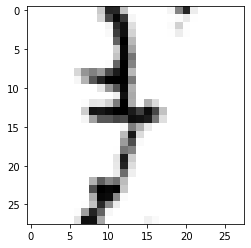

LABEL: 6


In [26]:
i=0
while (y_train[i]!=2): 
    i+=1
i_2=i
#print(i_2)
plot_input(X_train,y_train,i_2)

i=0
while (y_train[i]!=0): 
    i+=1
i_0=i
#print(i_0)
plot_input(X_train,y_train,i_0)
i=0

while (y_train[i]!=4): 
    i+=1
i_4=i
#print(i_4)
plot_input(X_train,y_train,i_4)
i=0

while (y_train[i]!=6): 
    i+=1
i_6=i
#print(i_6)
plot_input(X_train,y_train,i_6)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [27]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

best_SVM = SVC(kernel='rbf', C=7, gamma=0.01)
best_SVM.fit(X_train,y_train)
predicted = best_SVM.predict(X_test)

confusion_SVM = metrics.confusion_matrix(y_test, predicted, labels=best_SVM.classes_)

logreg = linear_model.LogisticRegression(C=1,fit_intercept=True,max_iter=3000) #a large C disables regularization
logreg.fit(X_train,y_train)
predicted=logreg.predict(X_test)

confusion_LR = metrics.confusion_matrix(y_test, predicted, labels=logreg.classes_)


Labels and frequencies in test set:  [5394 5400 5396 5394 5373 5424 5422 5402 5423 5372]



 Confusion matrix SVM  
 



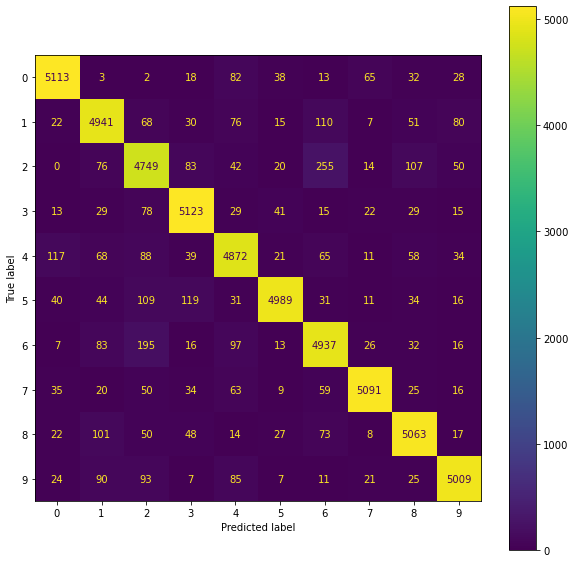

In [28]:
print("\n Confusion matrix SVM  \n \n")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_SVM,display_labels=best_SVM.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)


 Confusion matrix SVM (normalized)   
 



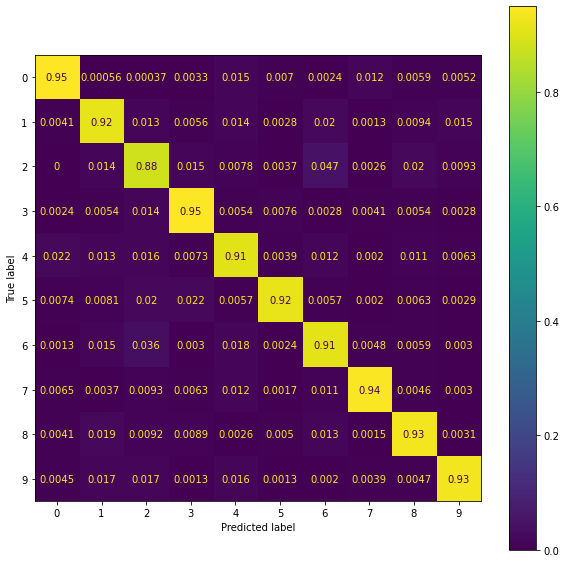

In [29]:
print("\n Confusion matrix SVM (normalized)   \n \n")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_SVM/counts[:,None],display_labels=best_SVM.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)


 Confusion matrix LR  
 



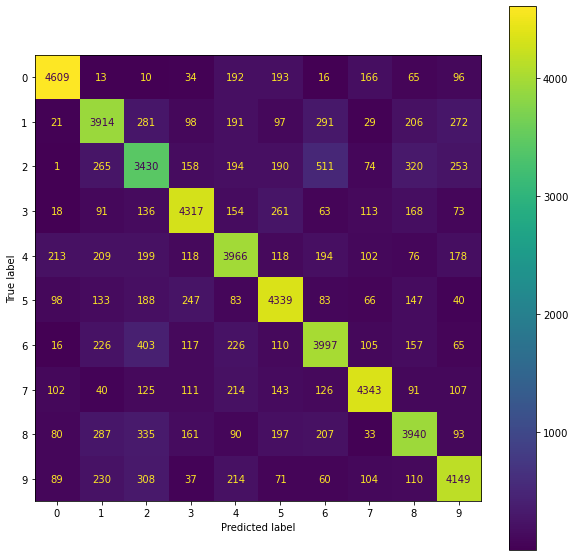

In [30]:
print("\n Confusion matrix LR  \n \n")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_LR,display_labels=logreg.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)


 Confusion matrix LR (normalized)  
 



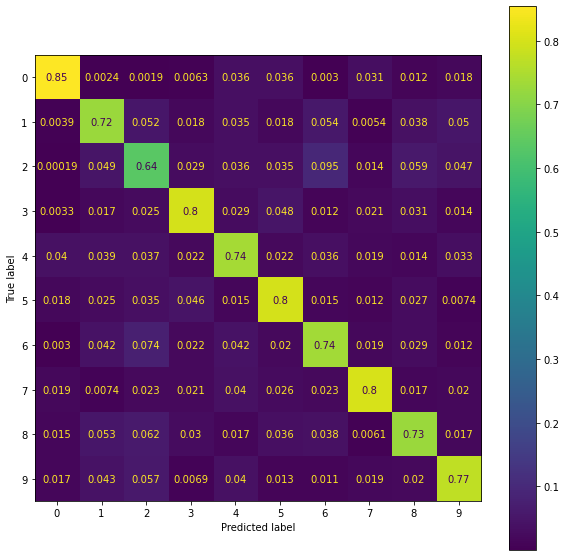

In [31]:
print("\n Confusion matrix LR (normalized)  \n \n")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_LR/counts[:,None],display_labels=logreg.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
## ANSWER 4
First of all, again we can notice the higher accurancy of the SVM by the highest fraction of success along the diagonal of the confusion matrices. Still, there are come classes that suffer wrong classification more than others, and are consistent between SVM and logreg. 
In particular, classes 2 and 4. This could be due to the fact that these samples can be particularly similar to others in the set (see previous TODO). The highest confusion for the SVM about class 2 is with class 6, and the same is true for logreg. Instead, class 4 is more easily confused by SVM with class 0, and in this case logreg displays a different situation: the level of confusion is more smeared and almost equally divided between classes 0,1,2,6 and 9; this for me represents a signature of the need of a more advanced method, capable of better distinguishing among the classes and reducing the level of uncertainties at least to other 1-class. 